In [5]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as mlt

In [6]:
df = pd.read_excel("C:/Users/LENOVO/Downloads/Ecommerce_sales/Superstore_USA.xlsx")


In [7]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [9]:
df.shape

(9426, 24)

In [11]:
#check the null or missing values
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [17]:
df.columns = df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')

In [18]:
df.columns

Index(['row_id', 'order_priority', 'discount', 'unit_price', 'shipping_cost',
       'customer_id', 'customer_name', 'ship_mode', 'customer_segment',
       'product_category', 'product_sub-category', 'product_container',
       'product_name', 'product_base_margin', 'region', 'state_or_province',
       'city', 'postal_code', 'order_date', 'ship_date', 'profit',
       'quantity_ordered_new', 'sales', 'order_id'],
      dtype='object')

In [21]:
#remove all null values by the mean 
df['product_base_margin'] = df['product_base_margin'].fillna(df['product_base_margin'].mean())


In [22]:
df.isnull().sum()

row_id                  0
order_priority          0
discount                0
unit_price              0
shipping_cost           0
customer_id             0
customer_name           0
ship_mode               0
customer_segment        0
product_category        0
product_sub-category    0
product_container       0
product_name            0
product_base_margin     0
region                  0
state_or_province       0
city                    0
postal_code             0
order_date              0
ship_date               0
profit                  0
quantity_ordered_new    0
sales                   0
order_id                0
dtype: int64

In [34]:
df['order_priority'].value_counts()


order_priority
High             2433
Low              2348
Medium           2325
Not Specified    2320
Name: count, dtype: int64

In [30]:
df['order_priority'].unique()


array(['Not Specified', 'High', 'Medium', 'Low'], dtype=object)

In [31]:
df['order_priority']=df['order_priority'].replace('Critical ','Critical')

In [32]:
df['order_priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low'], dtype=object)

Analysing data using graphs

Text(0.5, 1.0, 'Count of Order Priority')

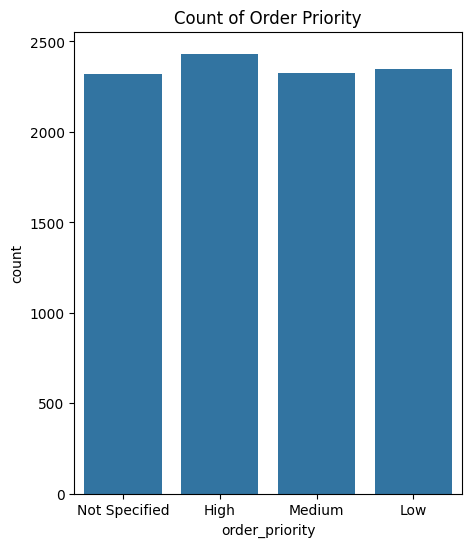

In [41]:

mlt.figure(figsize=(5,6))
sn.countplot(x='order_priority',data =df)
mlt.savefig('Count of Order Priority.jpg')
mlt.title('Count of Order Priority')

Ship Mode

In [43]:
df['ship_mode'].value_counts()

ship_mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [46]:
x=df['ship_mode'].value_counts().index
y=df['ship_mode'].value_counts().values

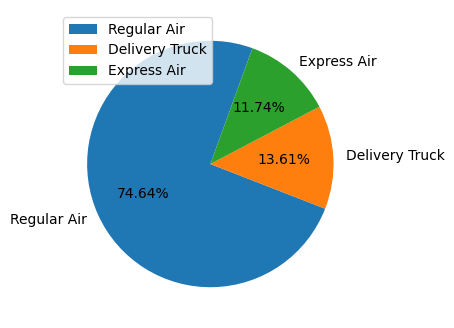

In [57]:
mlt.figure(figsize=(5,4))
mlt.pie(y,labels=x,startangle=70,autopct='%0.2f%%')
mlt.legend(loc=2)
mlt.show()

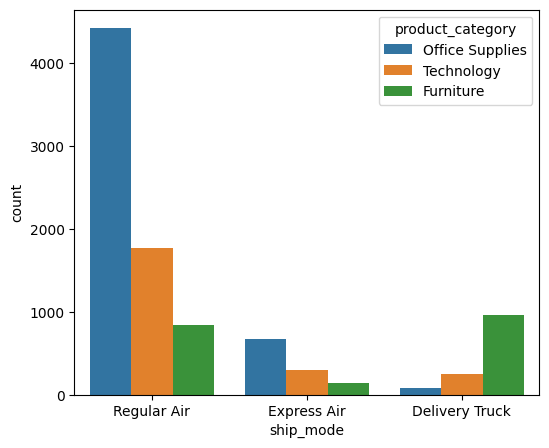

In [65]:
mlt.figure(figsize=(6,5))
sn.countplot(x='ship_mode',data=df, hue='product_category')
mlt.show()

Customer Segment

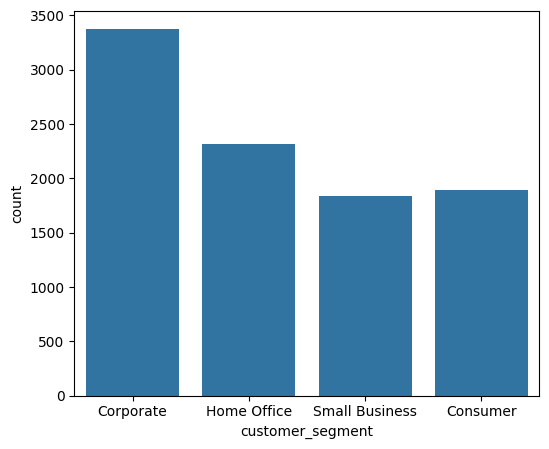

In [68]:
mlt.figure(figsize=(6,5))
sn.countplot(x='customer_segment',data=df)
mlt.show()

product Category

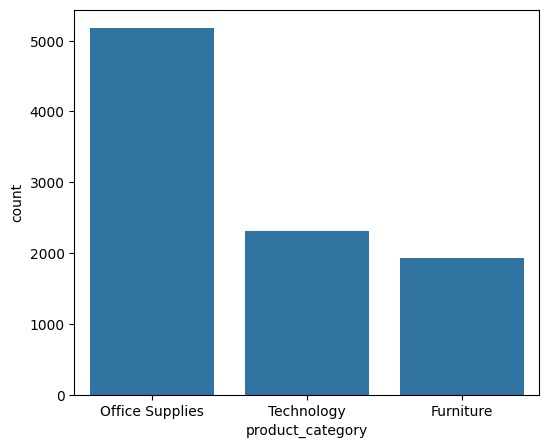

In [69]:
mlt.figure(figsize=(6,5))
sn.countplot(x='product_category',data=df)
mlt.show()

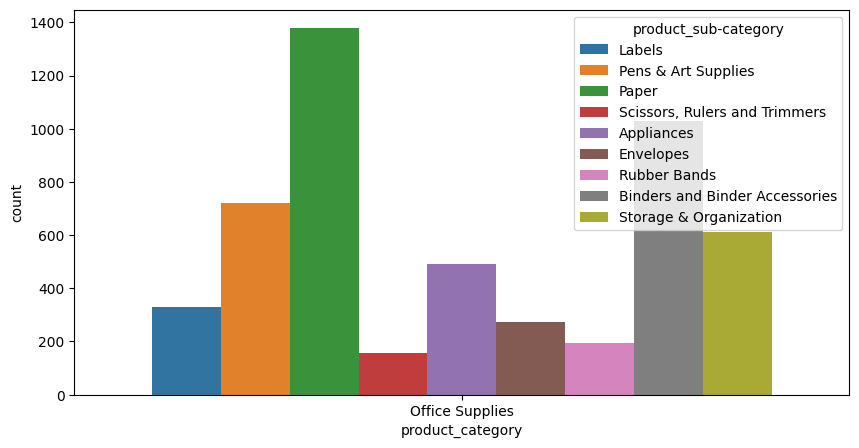

In [71]:
mlt.figure(figsize=(10,5))
sn.countplot(x='product_category',data=df[df['product_category']=='Office Supplies'],hue='product_sub-category')
mlt.show()

Analysing with order date

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   row_id                9426 non-null   int64         
 1   order_priority        9426 non-null   object        
 2   discount              9426 non-null   float64       
 3   unit_price            9426 non-null   float64       
 4   shipping_cost         9426 non-null   float64       
 5   customer_id           9426 non-null   int64         
 6   customer_name         9426 non-null   object        
 7   ship_mode             9426 non-null   object        
 8   customer_segment      9426 non-null   object        
 9   product_category      9426 non-null   object        
 10  product_sub-category  9426 non-null   object        
 11  product_container     9426 non-null   object        
 12  product_name          9426 non-null   object        
 13  product_base_margi

In [74]:
df['order_date'].dt.year

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: order_date, Length: 9426, dtype: int32

In [75]:
df['order_year']=df['order_date'].dt.year

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   row_id                9426 non-null   int64         
 1   order_priority        9426 non-null   object        
 2   discount              9426 non-null   float64       
 3   unit_price            9426 non-null   float64       
 4   shipping_cost         9426 non-null   float64       
 5   customer_id           9426 non-null   int64         
 6   customer_name         9426 non-null   object        
 7   ship_mode             9426 non-null   object        
 8   customer_segment      9426 non-null   object        
 9   product_category      9426 non-null   object        
 10  product_sub-category  9426 non-null   object        
 11  product_container     9426 non-null   object        
 12  product_name          9426 non-null   object        
 13  product_base_margi

In [77]:
df['order_year'].value_counts()

order_year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

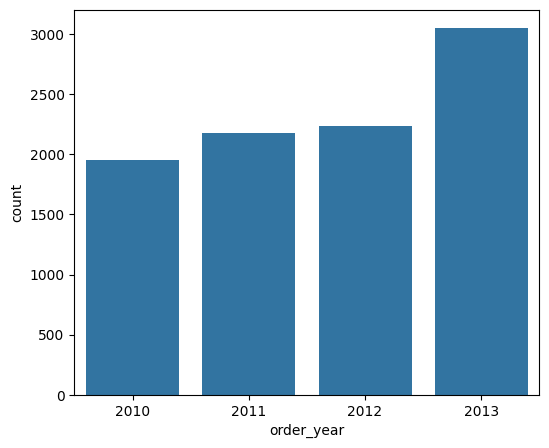

In [78]:
mlt.figure(figsize=(6,5))
sn.countplot(x='order_year',data=df)
mlt.show()

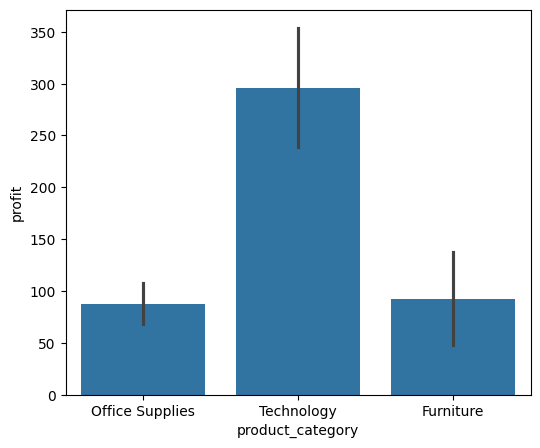

In [85]:
mlt.figure(figsize=(6,5))
sn.barplot(x='product_category',y='profit',data=df)
mlt.show()

In [89]:
df['state_or_province'].value_counts()[:5]

state_or_province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64